# Case Study : Inference

Since this is the second case study we'll be doing, you have some idea of how things work now. The idea here is that we spent a lot of time in class walking through the steps of the analysis, discussing what to consider each step of the way. Now, it's time to actually do the analysis!

Your goal is to, without much structure provided, consider what we discussed in lecture last week with regards to prestige and readership. Then, utilize the data provided to answer the question we discussed in class last week: *Do Pulitzers help newspapers keep readers?*, or more specifically *By looking at Pulitzer prizes awarded and changes in readership, can we determine what the effect of prestige is on the viewership at the 50 most popular newspapers over between 2004 and 2013?*

The URL to the data for use in answering this question from FiveThirtyEight is https://raw.githubusercontent.com/fivethirtyeight/data/master/pulitzer/pulitzer-circulation-data.csv. 


# Part I : Setup & Data Wrangling

In this section you'll want to:
- import any packages you'll need for your analysis
- read the dataset in
- understand what's going on in the data
    - how many observations?
    - what variables do you have? what variable types are here
    - which will you need to answer the question?

In [4]:
# Import seaborn and apply its plotting styles
import seaborn as sns
sns.set(font_scale=2, style="white")

# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# set plotting size parameter
plt.rcParams['figure.figsize'] = (17, 7)

# import pandas & numpy library
import pandas as pd
import numpy as np

# Statmodels & patsy
import patsy
import statsmodels.api as sm

import scipy.stats as stats
from scipy.stats import normaltest

#improve resolution
%config InlineBackend.figure_format ='retina'

In [5]:
# Get CSV directly from URL
pulitzer = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/pulitzer/pulitzer-circulation-data.csv')
pulitzer.head()

,Newspaper,"Daily Circulation, 2004","Daily Circulation, 2013","Change in Daily Circulation, 2004-2013","Pulitzer Prize Winners and Finalists, 1990-2003","Pulitzer Prize Winners and Finalists, 2004-2014","Pulitzer Prize Winners and Finalists, 1990-2014"
0,USA Today,"2,192,098","1,674,306",-24%,1,1,2
1,Wall Street Journal,"2,101,017","2,378,827",+13%,30,20,50
2,New York Times,"1,119,027","1,865,318",+67%,55,62,117
3,Los Angeles Times,"983,727","653,868",-34%,44,41,85
4,Washington Post,"760,034","474,767",-38%,52,48,100


In [6]:
# review columns
list(pulitzer)

['Newspaper',
 'Daily Circulation, 2004',
 'Daily Circulation, 2013',
 'Change in Daily Circulation, 2004-2013',
 'Pulitzer Prize Winners and Finalists, 1990-2003',
 'Pulitzer Prize Winners and Finalists, 2004-2014',
 'Pulitzer Prize Winners and Finalists, 1990-2014']

In [7]:
# get shape of dataset
pulitzer.shape

(50, 7)

Okay, so we can see the data here. Each row (observation) contains data about a different newspaper. It looks like we have information from 50 different newspapers. We ultimately want to look at the relationship between number of pulitzers won and readership. We'd like to see this over time, but we may be restricted to just comparing early 2000s with 2013. This is a limitation of the analysis, but a good place to start. Now, it's time to wrangle...

In [8]:
# why aren't daily circulation numbers in there?
pulitzer.dtypes

Newspaper                                          object
Daily Circulation, 2004                            object
Daily Circulation, 2013                            object
Change in Daily Circulation, 2004-2013             object
Pulitzer Prize Winners and Finalists, 1990-2003     int64
Pulitzer Prize Winners and Finalists, 2004-2014     int64
Pulitzer Prize Winners and Finalists, 1990-2014     int64
dtype: object

Ah, so circulation is an object....we want this to be numeric. Let's take care of that!

In [9]:
# get rid of the commas in the numbers for Daily Circulation
pulitzer['Daily Circulation, 2004'] = pulitzer['Daily Circulation, 2004'].str.replace(',', '').astype(float)
pulitzer['Daily Circulation, 2013'] = pulitzer['Daily Circulation, 2013'].str.replace(',', '').astype(float)
pulitzer['Change in Daily Circulation, 2004-2013'] = pulitzer['Change in Daily Circulation, 2004-2013'].str.replace('%', '').astype(float)

In [10]:
# verify that that worked
pulitzer.dtypes

Newspaper                                           object
Daily Circulation, 2004                            float64
Daily Circulation, 2013                            float64
Change in Daily Circulation, 2004-2013             float64
Pulitzer Prize Winners and Finalists, 1990-2003      int64
Pulitzer Prize Winners and Finalists, 2004-2014      int64
Pulitzer Prize Winners and Finalists, 1990-2014      int64
dtype: object

# Part II : EDA & Visualization

Once you understand your dataset, you'll want to:
- understand the relationships and trends for the variables in your dataset
- generate exploratory visualizations


In [11]:
# take a look at some descriptive statistics
pulitzer.describe()

,"Daily Circulation, 2004","Daily Circulation, 2013","Change in Daily Circulation, 2004-2013","Pulitzer Prize Winners and Finalists, 1990-2003","Pulitzer Prize Winners and Finalists, 2004-2014","Pulitzer Prize Winners and Finalists, 1990-2014"
count,5.000000e+01,5.000000e+01,50.000000,50.000000,50.000000,50.000000
mean,4.624217e+05,3.624628e+05,-29.200000,8.340000,6.720000,15.060000
std,3.965849e+05,4.404812e+05,27.066811,12.886649,12.142084,24.640609
min,2.157350e+05,0.000000e+00,-100.000000,0.000000,0.000000,0.000000
25%,2.598472e+05,1.617345e+05,-40.750000,1.000000,1.000000,2.000000
50%,3.400875e+05,2.293365e+05,-32.500000,4.000000,3.000000,7.000000
75%,4.909875e+05,3.733708e+05,-20.000000,9.750000,6.750000,15.250000
max,2.192098e+06,2.378827e+06,67.000000,55.000000,62.000000,117.000000


Here we see that the mean daily circulation decreased from 2004 to 2013. This is in line with what we may expect, given reports that newspaper readership is decreasing in the age of the Internet. But, we also see that there is a fair amount of variability. This also makes sense, as some newspapers are much more popular than others. 

The change in daily circulation is important as well and we see that this number is negative, thus capturing the overall downward trend we expected in readership over this time period.

When we start to consider Pulitzter Prize winners we see that the mean number has varied from 8.3 in 1990-2003 to 6.7 in 2004-2014. We note that the final column combines these data across the time period of 1990-2014. 

Let's generate some plots to understand the overall distribution.

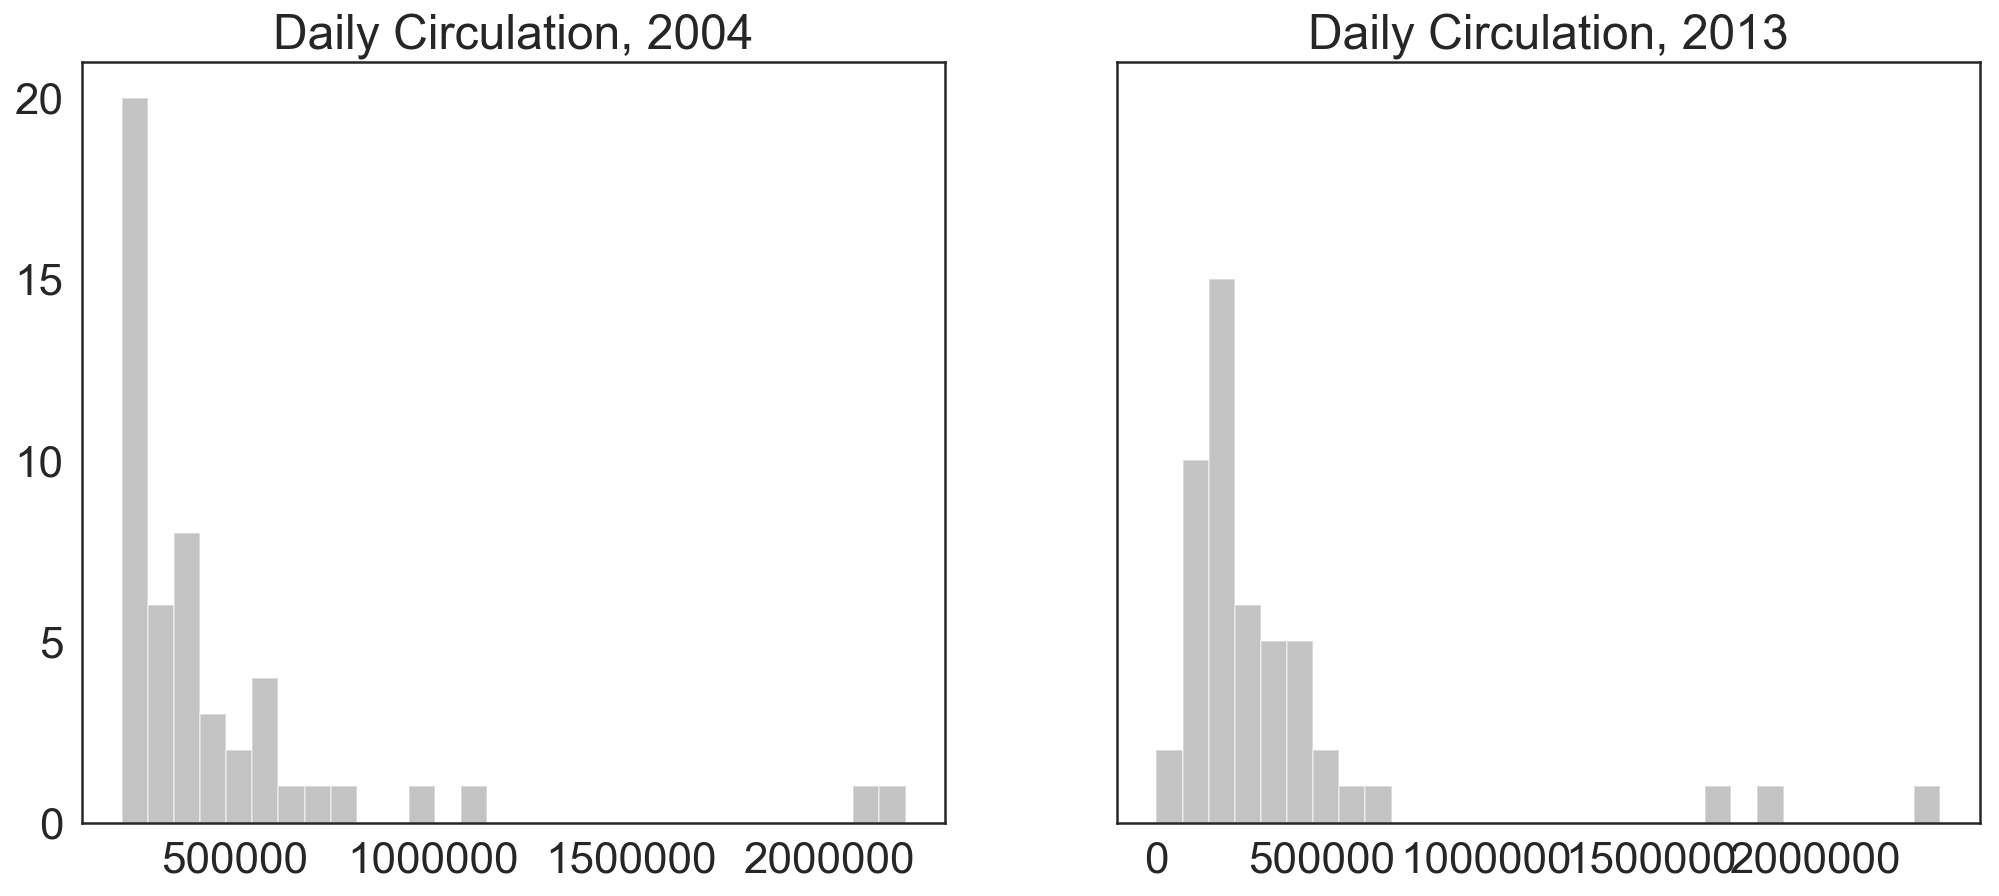

In [12]:
## look at daily circulation distribtuion
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.distplot(pulitzer['Daily Circulation, 2004'], ax=ax1,  kde=False, bins=30, color="dimgrey")
ax1.set_title('Daily Circulation, 2004')
ax1.set_xlabel('')
sns.distplot(pulitzer['Daily Circulation, 2013'], ax=ax2, kde=False, bins=30, color="dimgrey")
ax2.set_title('Daily Circulation, 2013')
ax2.set_xlabel('');

The x-axis isn't the prettiest, but we get a sense for what's going on. Most newspapers have smaller readership bases, with a few outlier newspapers. Now, let's look at the distribution of Pulitzter prize winners for the same time period.

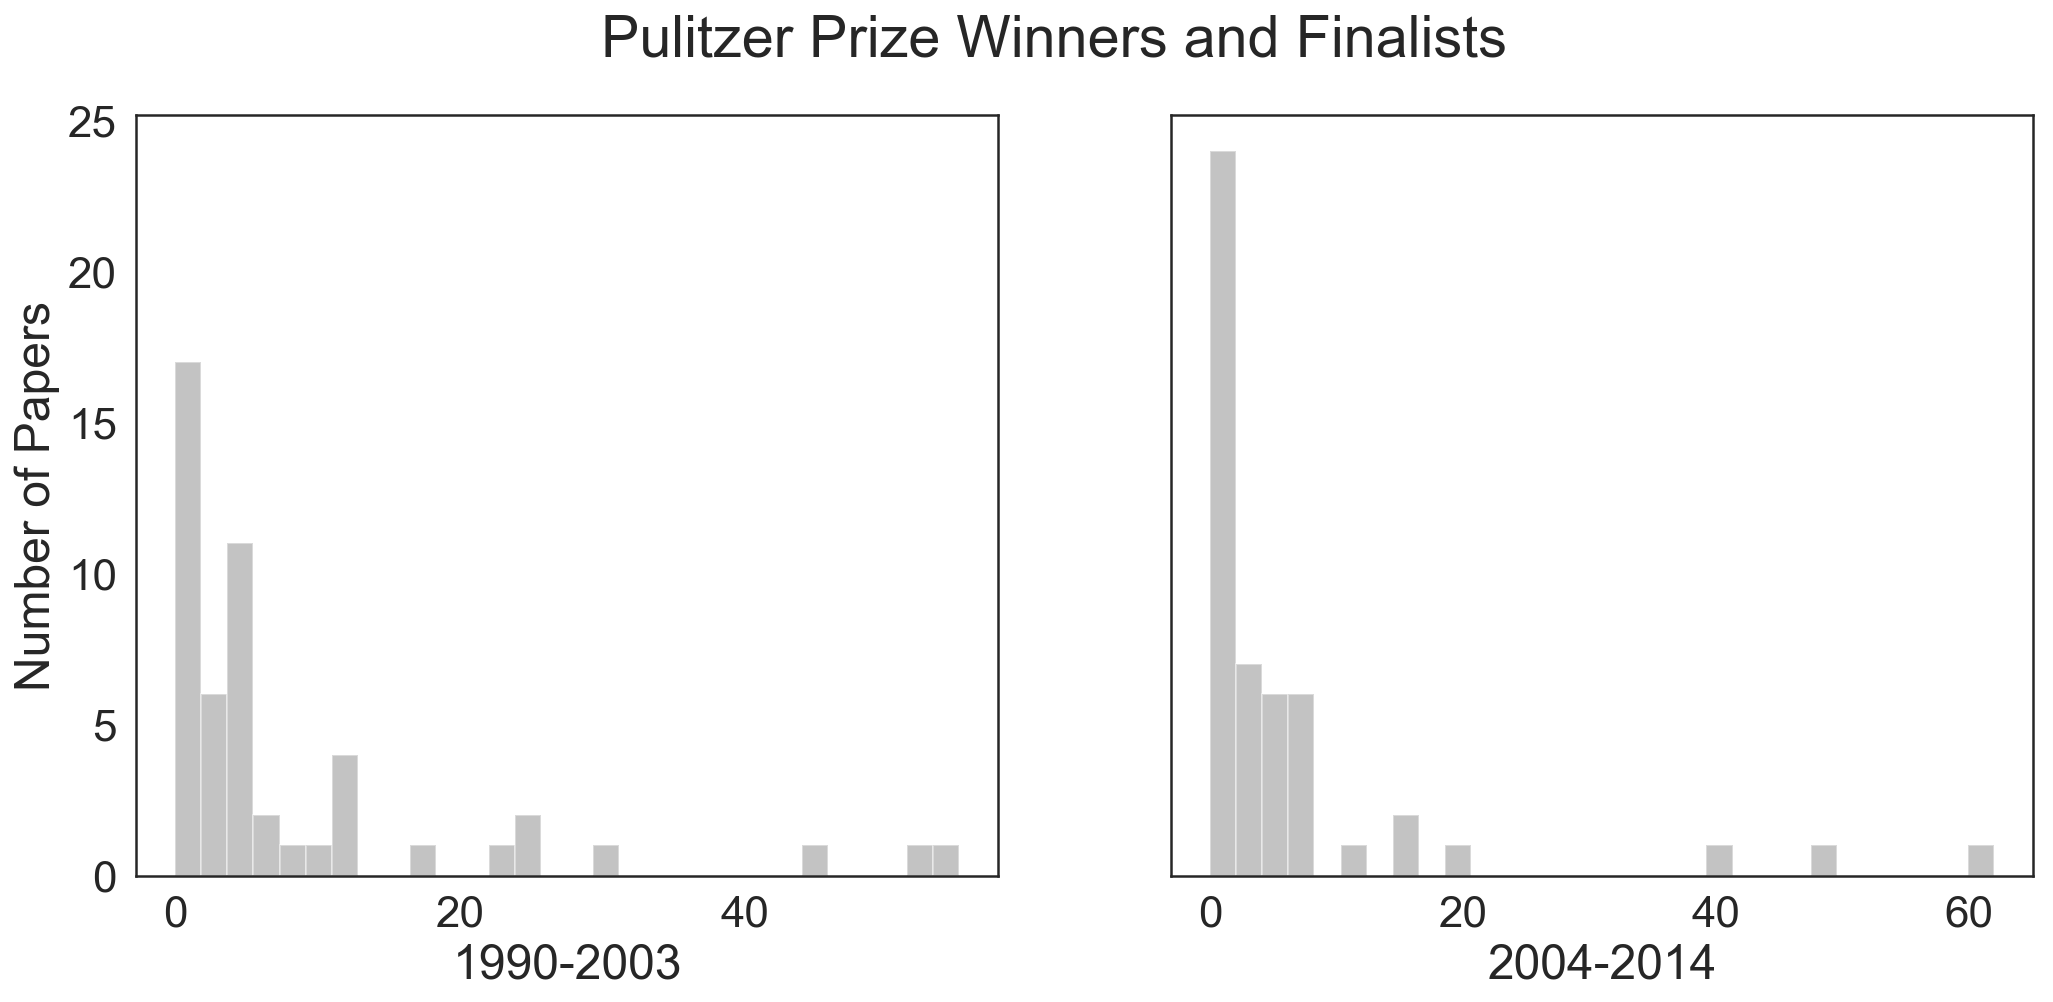

In [13]:
## look at pulitzer prize winner distributions
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
fig.suptitle('Pulitzer Prize Winners and Finalists')
sns.distplot(pulitzer['Pulitzer Prize Winners and Finalists, 1990-2003'], ax=ax1,  kde=False, bins=30, color="dimgrey")
ax1.set_xlabel('1990-2003')
ax1.set_ylabel('Number of Papers')
sns.distplot(pulitzer['Pulitzer Prize Winners and Finalists, 2004-2014'], ax=ax2,  kde=False, bins=30, color="dimgrey")
ax2.set_xlabel('2004-2014');

Here, over the two time periods of interest the distributions look similar, although we note that we are only looking at the histogram for 50 newspapers, so our observations are limited. Nevertheless, most of the data clusters around 0, with ony a few newspapers receiving more than 20 pulitzers over the time periods we're interested in. These data are clearly not Normally distributed, but are skewed right...something we'll want to keep in mind when we analyze these data.

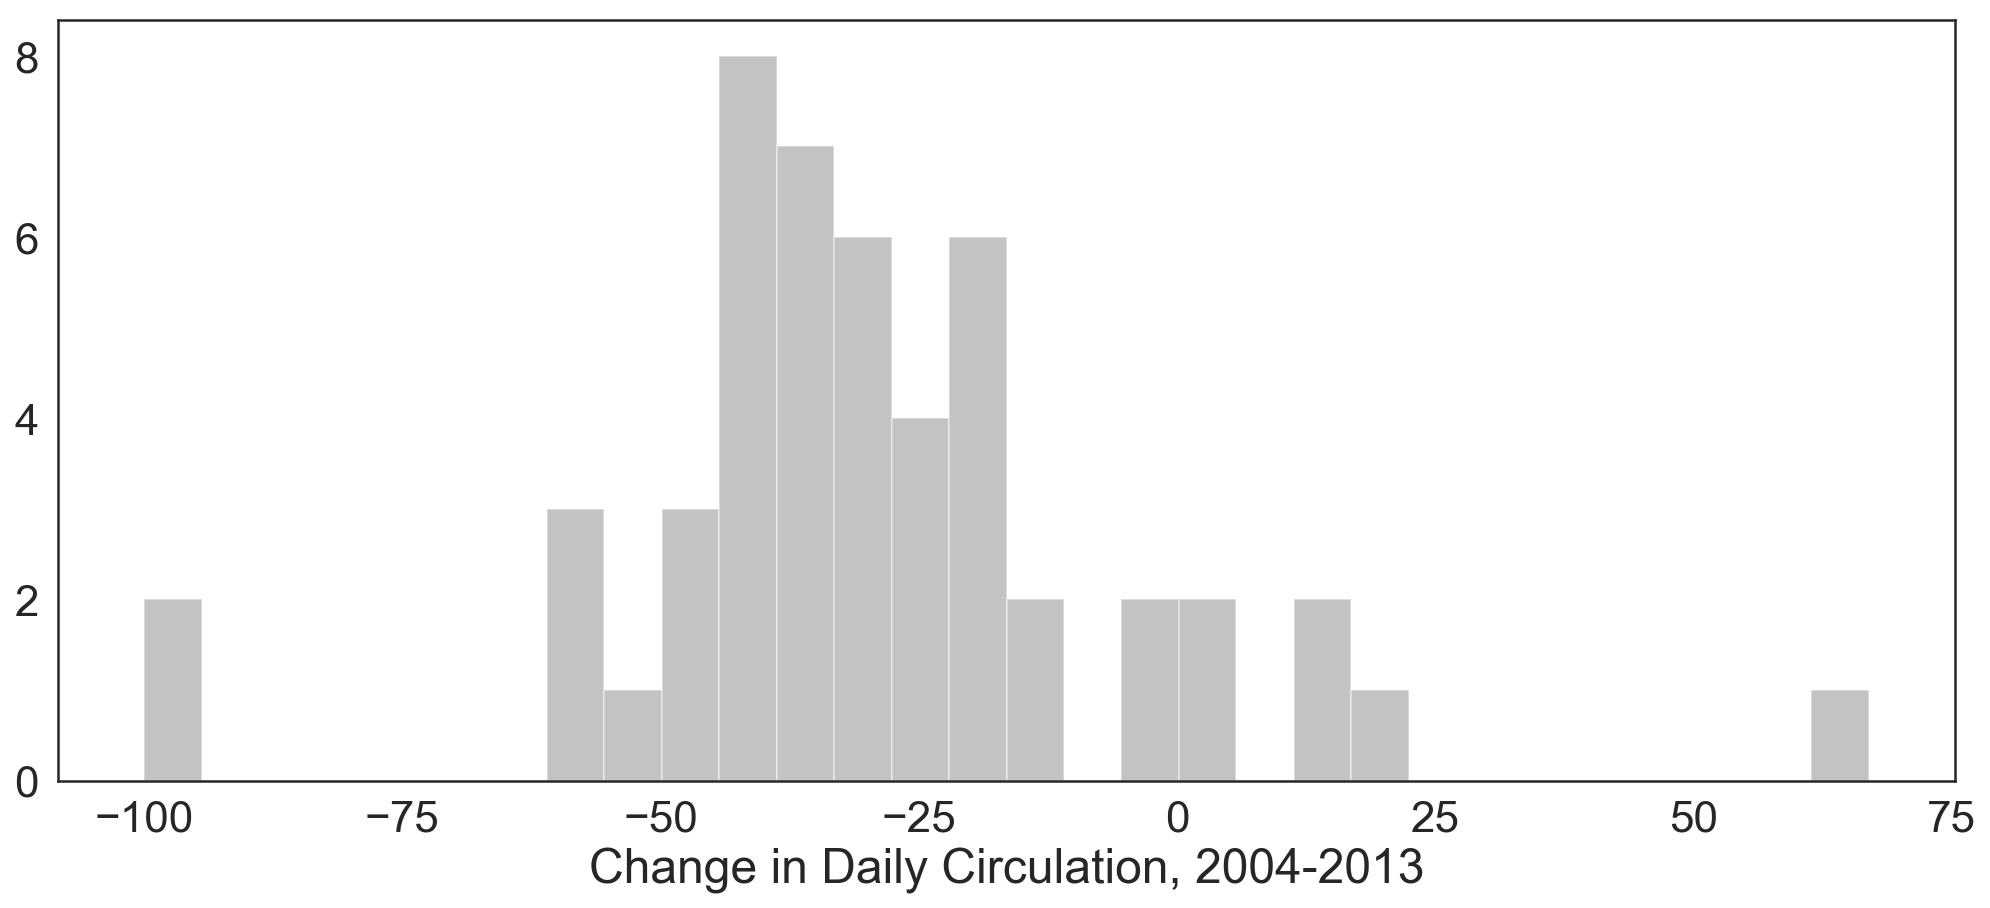

In [14]:
sns.distplot(pulitzer['Change in Daily Circulation, 2004-2013'],  kde=False, bins=30, color="dimgrey");

Here we see our final univariate plot of interest. We now see that while there is an overall downward trend in daily circulation (mean ~ -25), there are papers whose readership has increased. That outlier to the right, let's check out which paper that is...

In [15]:
pulitzer[pulitzer['Change in Daily Circulation, 2004-2013'] > 30] 

,Newspaper,"Daily Circulation, 2004","Daily Circulation, 2013","Change in Daily Circulation, 2004-2013","Pulitzer Prize Winners and Finalists, 1990-2003","Pulitzer Prize Winners and Finalists, 2004-2014","Pulitzer Prize Winners and Finalists, 1990-2014"
2,New York Times,1119027.0,1865318.0,67.0,55,62,117


New York Times - that makes enough sense with our intution about popular publications. We also note that two newspapers have a -100 change in daily circulation. This is an interesting data point and something we want to investigate further. What's going on here?

In [16]:
pulitzer[pulitzer['Change in Daily Circulation, 2004-2013']<-75]

,Newspaper,"Daily Circulation, 2004","Daily Circulation, 2013","Change in Daily Circulation, 2004-2013","Pulitzer Prize Winners and Finalists, 1990-2003","Pulitzer Prize Winners and Finalists, 2004-2014","Pulitzer Prize Winners and Finalists, 1990-2014"
25,Rocky Mountain News,340007.0,0.0,-100.0,4,1,5
36,New Orleans Times-Picayune,262008.0,0.0,-100.0,5,3,8


If we Google these papers we see that [Rocky Mountain News closed its doors in 2009](https://en.wikipedia.org/wiki/Rocky_Mountain_News). It makes sense that the readership decreased by -100 there. Now, what about New Orleans Times-Picayune? They [still have a website](https://www.nola.com/), so closure is not the same case here. When we dig a little deeper we see that [it is no longer published daily](https://en.wikipedia.org/wiki/The_Times-Picayune), explaining daily circulation having a measure of -100. We'll have to consider how to handle these data points. 

With that understanding of the readership numbers in our dataset, we'll continue our EDA to get a more specific understanding of the Pulitzer portion of the data. We now want to answer these questions before moving forward: 

1. What's a typical number of Pulitzers? What's that distribution look like?
1. Have the same newspapers consistently won more Pulitzers? 
2. Who has won the most Pulitzers? 
3. Anything look off?

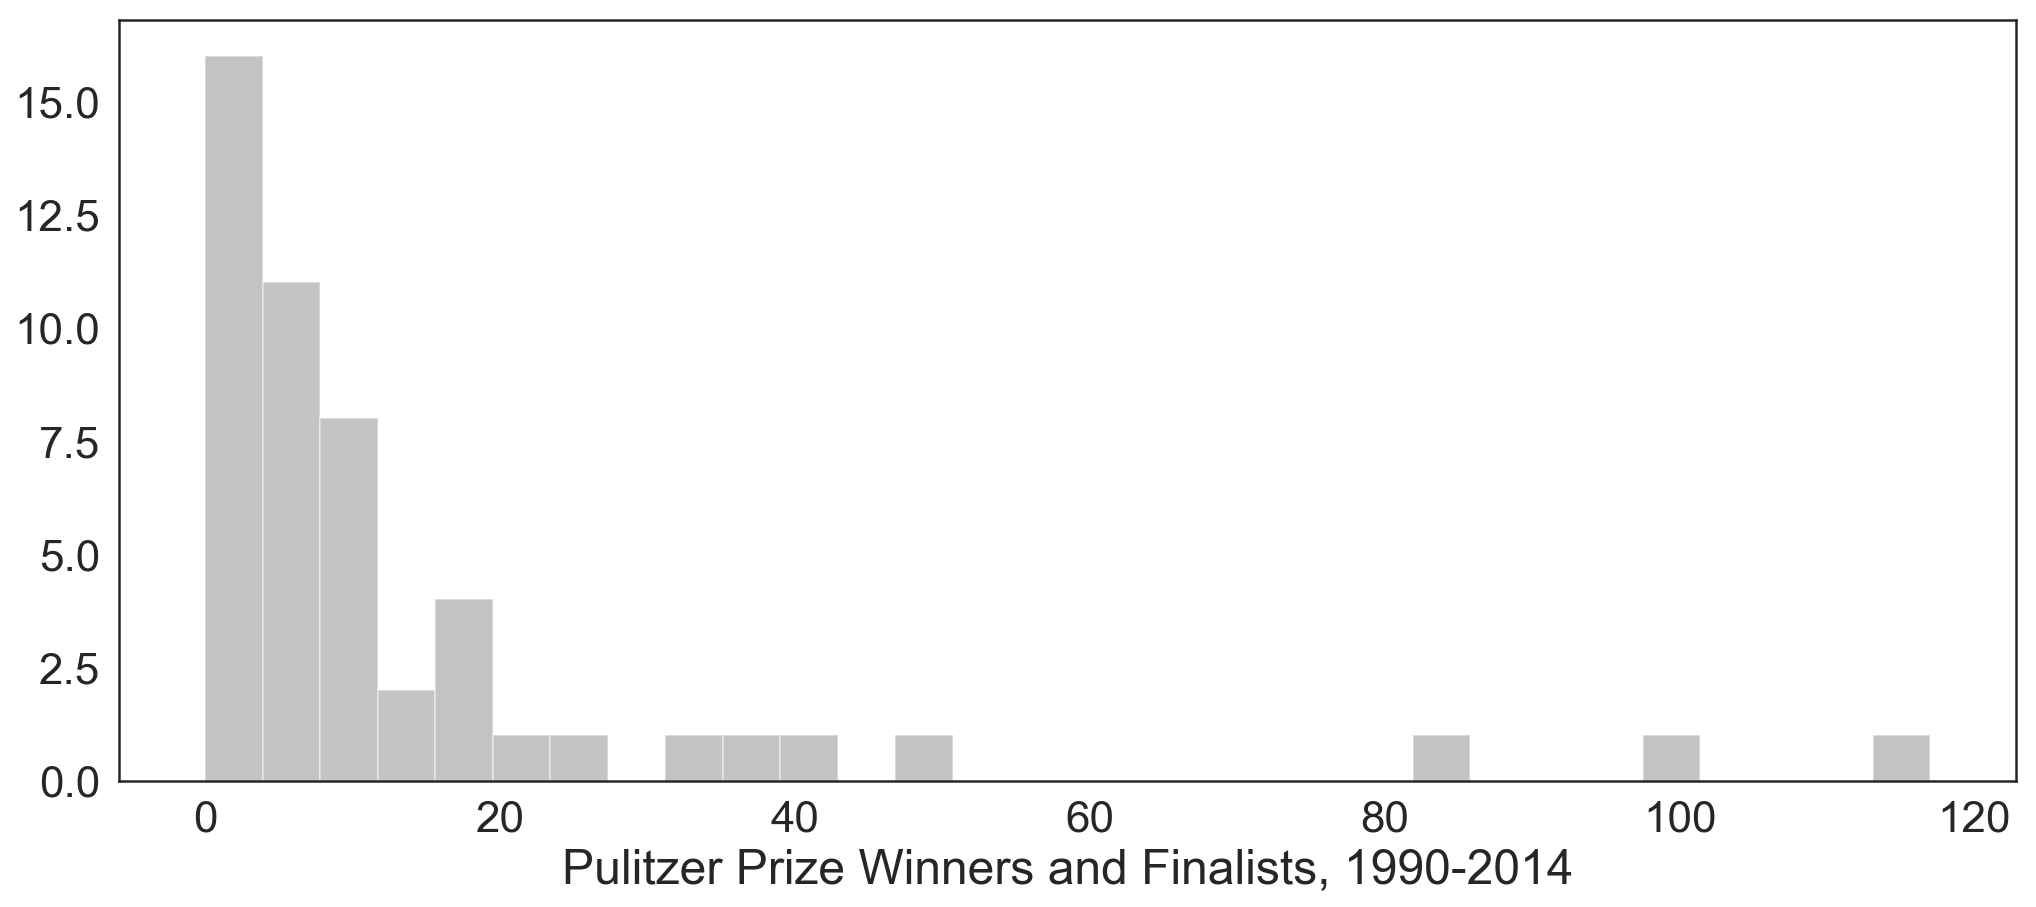

In [17]:
## look at pulitzer prize winner distributions
sns.distplot(pulitzer['Pulitzer Prize Winners and Finalists, 1990-2014'],  kde=False, bins=30, color="dimgrey")
ax1.set_xlabel('1990-2014')
ax1.set_ylabel('Number of Papers');


Here we see a distribution skewed right, with most publications receiving few awards and a few publications getting many more.

In [18]:
pulitzer[pulitzer['Pulitzer Prize Winners and Finalists, 1990-2014']>80]

,Newspaper,"Daily Circulation, 2004","Daily Circulation, 2013","Change in Daily Circulation, 2004-2013","Pulitzer Prize Winners and Finalists, 1990-2003","Pulitzer Prize Winners and Finalists, 2004-2014","Pulitzer Prize Winners and Finalists, 1990-2014"
2,New York Times,1119027.0,1865318.0,67.0,55,62,117
3,Los Angeles Times,983727.0,653868.0,-34.0,44,41,85
4,Washington Post,760034.0,474767.0,-38.0,52,48,100


We see here that these three publications earned the most overall, and the most in each of the time periods specified. They've been around a while and have been the most successful at winning Pulitzers. Let's see that trend overall across all papers in our dataset.

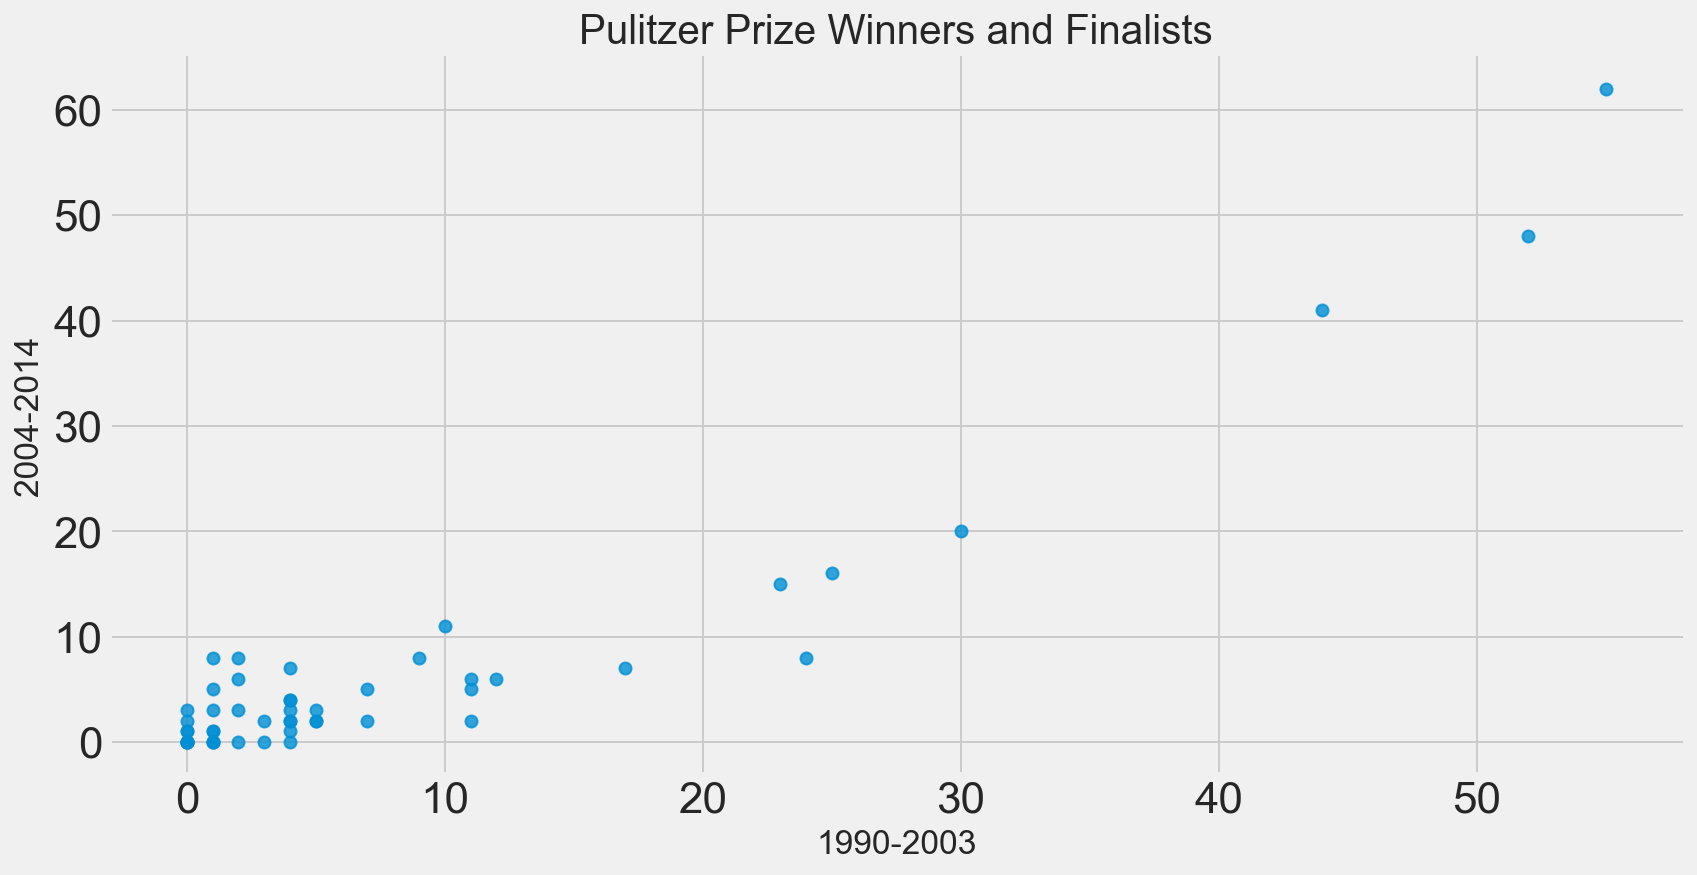

In [19]:
#use fivethirtyeight style
# mostly for fun ; data are from them
style.use('fivethirtyeight') 

# look at number of pulitzers between two time periods
sns.lmplot(x = 'Pulitzer Prize Winners and Finalists, 1990-2003',
           y = 'Pulitzer Prize Winners and Finalists, 2004-2014',
           data = pulitzer, 
           fit_reg = False, 
           height = 6, 
           aspect=2)
plt.xlabel('1990-2003')
plt.ylabel('2004-2014')
plt.title('Pulitzer Prize Winners and Finalists');

Ok, so generally, the same papers winning the most Pulitzers in the 90's are the same as those winning those in the 2000s.

In [20]:
# who has won the most pulitzers during the years we're looking at? 
pulitzer.sort_values('Pulitzer Prize Winners and Finalists, 1990-2014', ascending = False).head()

,Newspaper,"Daily Circulation, 2004","Daily Circulation, 2013","Change in Daily Circulation, 2004-2013","Pulitzer Prize Winners and Finalists, 1990-2003","Pulitzer Prize Winners and Finalists, 2004-2014","Pulitzer Prize Winners and Finalists, 1990-2014"
2,New York Times,1119027.0,1865318.0,67.0,55,62,117
4,Washington Post,760034.0,474767.0,-38.0,52,48,100
3,Los Angeles Times,983727.0,653868.0,-34.0,44,41,85
1,Wall Street Journal,2101017.0,2378827.0,13.0,30,20,50
15,Boston Globe,446241.0,245572.0,-45.0,25,16,41


As we saw above, these come to mind as some of the most popular papers nationally, so there are no huge surprises here. The number of Puitzers is relatively consistent across the two time periods.

Before we carry out our analysis, we're going to remove the papers no longer in daily circulation from our analysis, as their data won't accurately reflect the relationship.

In [21]:
# filter out two non daily-circulation papers.
pulitzer = pulitzer[pulitzer['Change in Daily Circulation, 2004-2013'] > -75]
pulitzer.shape

(48, 7)

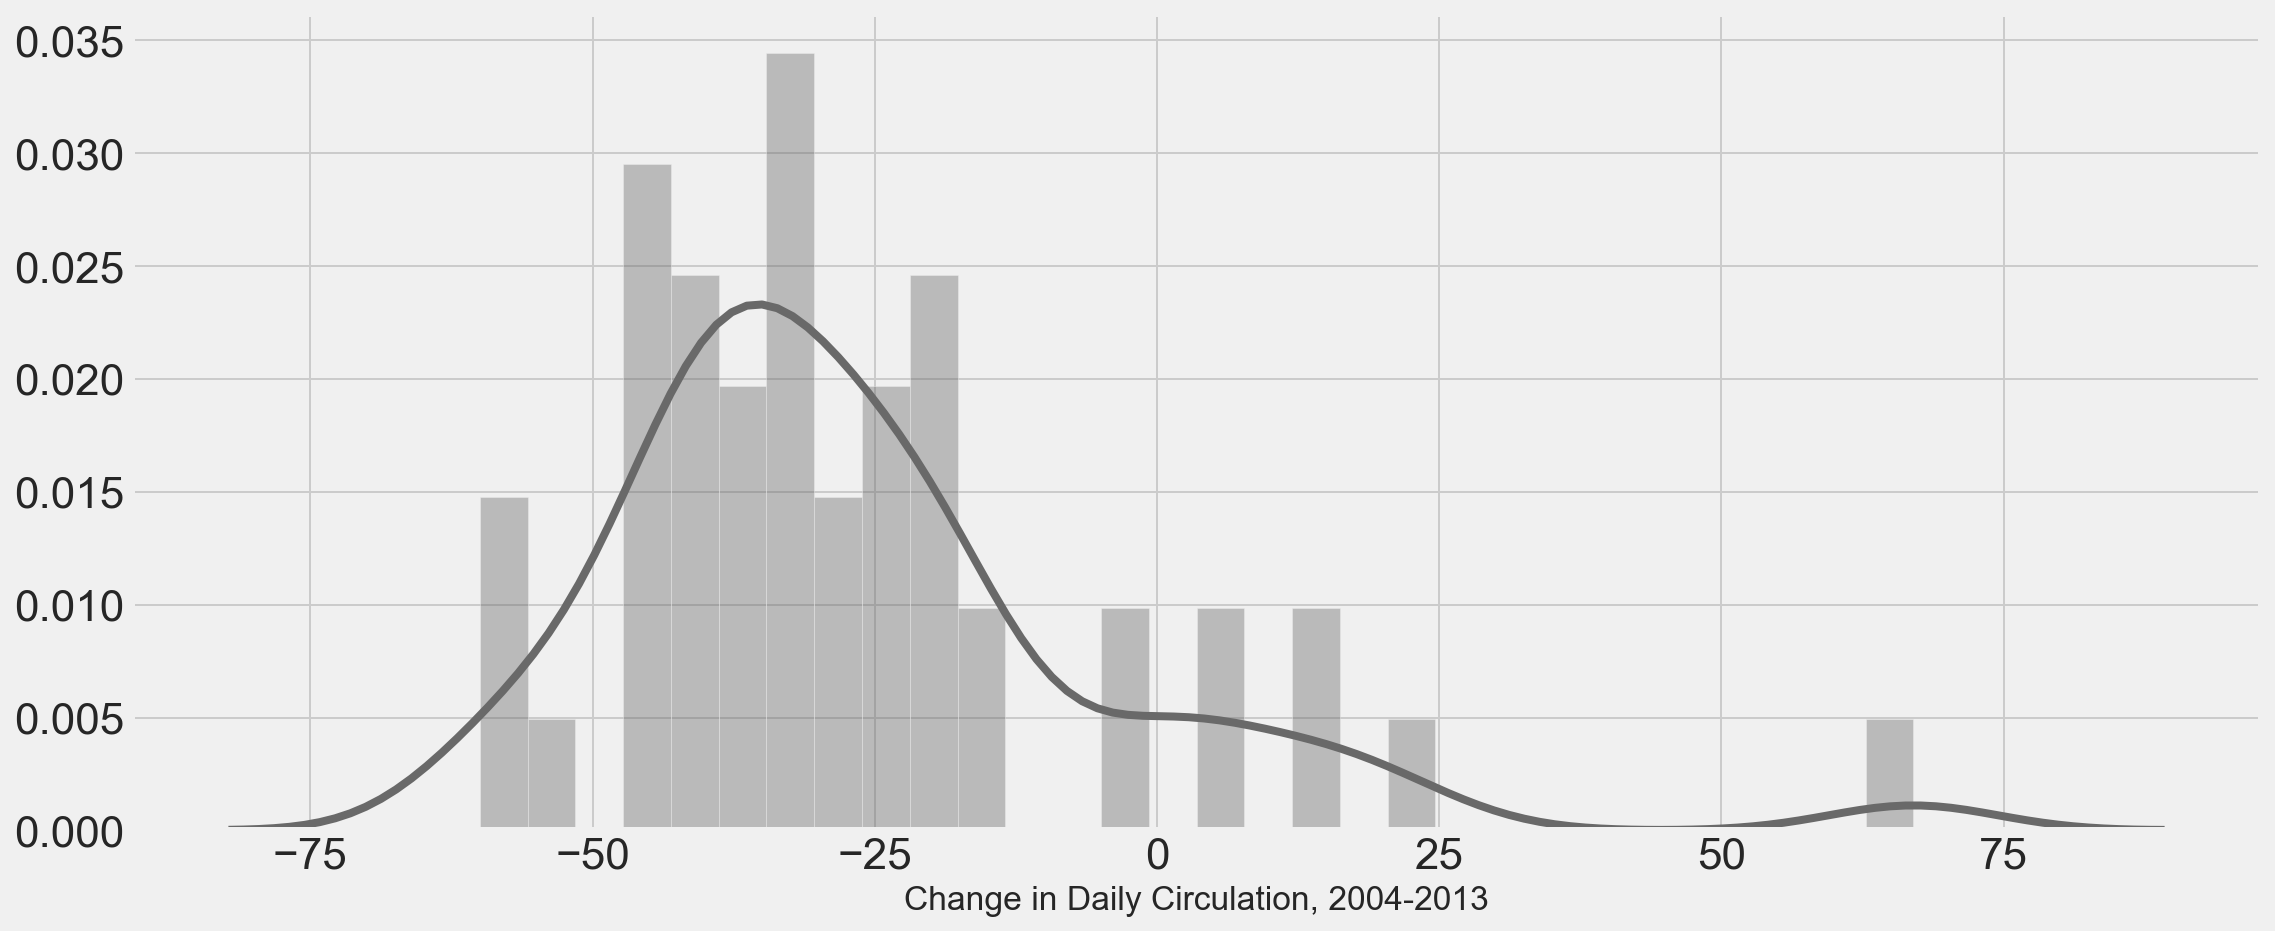

In [22]:
sns.distplot(pulitzer['Change in Daily Circulation, 2004-2013'], bins=30, color="dimgrey");

Now, after removing those two papers, if we look at daily circulation, the data are closer to normally distributed, but we note there are still papers that are outliers at the high end of circulation papers. 

# Part III : Inferential Analysis

Finally, answer the question! Carry out the inferential analysis required to answer your question of interest!

So, you could just plot the relationship between the Pulittzers and daily circulation in early years to get a sense of what's going on.

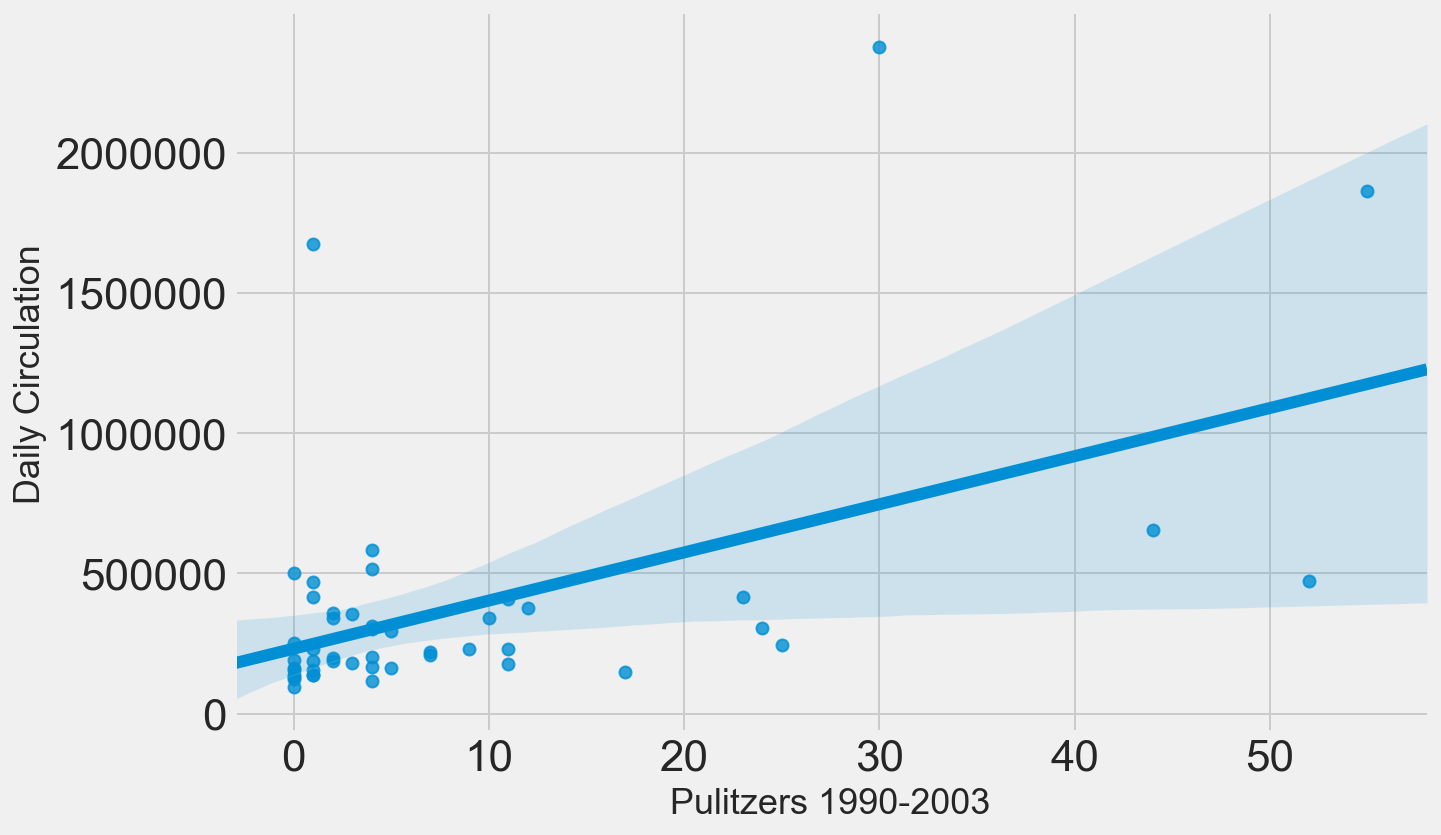

In [23]:
# Relationship between the number of Pulitzers in preceding years and readership
sns.lmplot(x = 'Pulitzer Prize Winners and Finalists, 1990-2003',
           y = 'Daily Circulation, 2013',
           data = pulitzer, 
           fit_reg = True, 
           height = 6, 
           aspect=1.7)
plt.xlabel('Pulitzers 1990-2003', size=18)
plt.ylabel('Daily Circulation', size=18)
plt.title('');

We see that there appears to be some general positive relationship but note that there are outliers in circulation, where circulation is much higher than number of Pulitzers won. 

But, maybe more interestingly, we want to look over the whole time period. To do this we'd want to see whether there is a relationship between total number of Pulitzers won over this time period and the change in circulation. In other words, we're looking to determine: Does winning more Pulitzers result in your readership changing less?

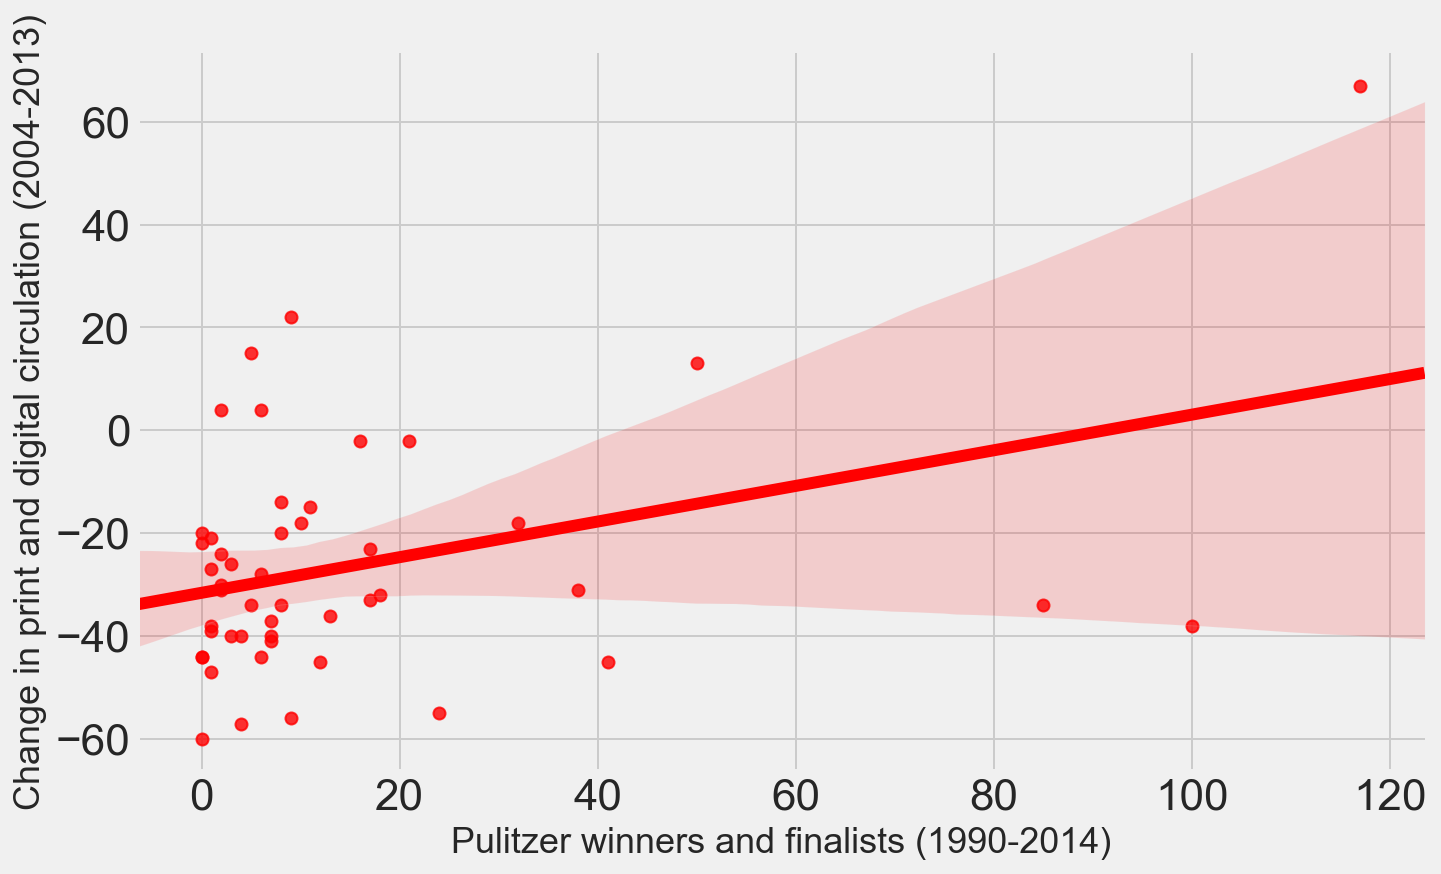

In [24]:
# Relationship between the total number of Pulitzers and change readership
sns.lmplot(x = 'Pulitzer Prize Winners and Finalists, 1990-2014',
           y = 'Change in Daily Circulation, 2004-2013',
           data = pulitzer, 
           fit_reg = True, 
           height = 6,
           aspect = 1.7, 
           line_kws={'color': 'red'},
           scatter_kws={'color': 'red'})
plt.xlabel('Pulitzer winners and finalists (1990-2014)', size=18)
plt.ylabel('Change in print and digital circulation (2004-2013)', size=18)
plt.title('');

Again, we see an overall positive relationship; however, we note that the data are mostly clustered around zero for number of Pulitzers. This suggests that we may need to transform these data to use linear regression.

If we didn't transform the data and carried out linear regression looking at the relationship between pulitzer number and circulation, the code would look something like what you see here:

In [27]:
# get subset of data we'll use for regression
df = pulitzer[['Change in Daily Circulation, 2004-2013', 
                         'Pulitzer Prize Winners and Finalists, 1990-2014']]
df.columns = ['circulation', 'pulitzer']
df.head()

,circulation,pulitzer
0,-24.0,2
1,13.0,50
2,67.0,117
3,-34.0,85
4,-38.0,100


In [29]:
# Patsy gives us an easy way to construct design matrices
# For our purpose, 'design matrices' are just organized matrices of our predictor and output variables
outcome, predictors = patsy.dmatrices('circulation ~ pulitzer',df)

# Now use statsmodels to intialize an OLS linear model
#  This step initializes the model, and provides the data (but does not actually compute the model)
mod = sm.OLS(outcome, predictors)

# fit the model
res = mod.fit()

# Check out the results
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            circulation   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     7.457
Date:                Thu, 09 May 2019   Prob (F-statistic):            0.00893
Time:                        10:01:29   Log-Likelihood:                -215.07
No. Observations:                  48   AIC:                             434.1
Df Residuals:                      46   BIC:                             437.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -31.5902      3.707     -8.521      0.0

You would then interpret that for and increase of 1 pulitzer at a newspaper, one would expect daily circulation to incrase by 0.387. Note also that the p-value here is 0.012, so this effect (or something more extreme) would be seen 1.2% of the time by random chance. 

Often, people talk about results being significant if their p-value is less than 0.05. Here, we're below that threshold, so many would conclude that these results are 'statistically significant'. But, it's up to us to look at the coefficient estimate, the error, the p-value, and the confidence interval to determine if this is a meaningful difference with regards to our question.

On first pass, despite the positive correlation we see above, the strength of hte relationship is small. Number of Pulitzers (our measure of prestige) appears to have a small effect on daily readership. 

But, we can't just *assume* Normality. We *know* that linear regression requires assumptions to be met.  The distribution of Pulitzers sure doesn't *look* normal. In fact, using what we did in last week's tutorial and in looking at the `11-TestingDistributions.ipynb` tutorial from this course, we see that we can test Normality!

In [30]:
# normal data
d1 = stats.norm.rvs(size=48)
# our data
d2 = pulitzer['Pulitzer Prize Winners and Finalists, 1990-2014']

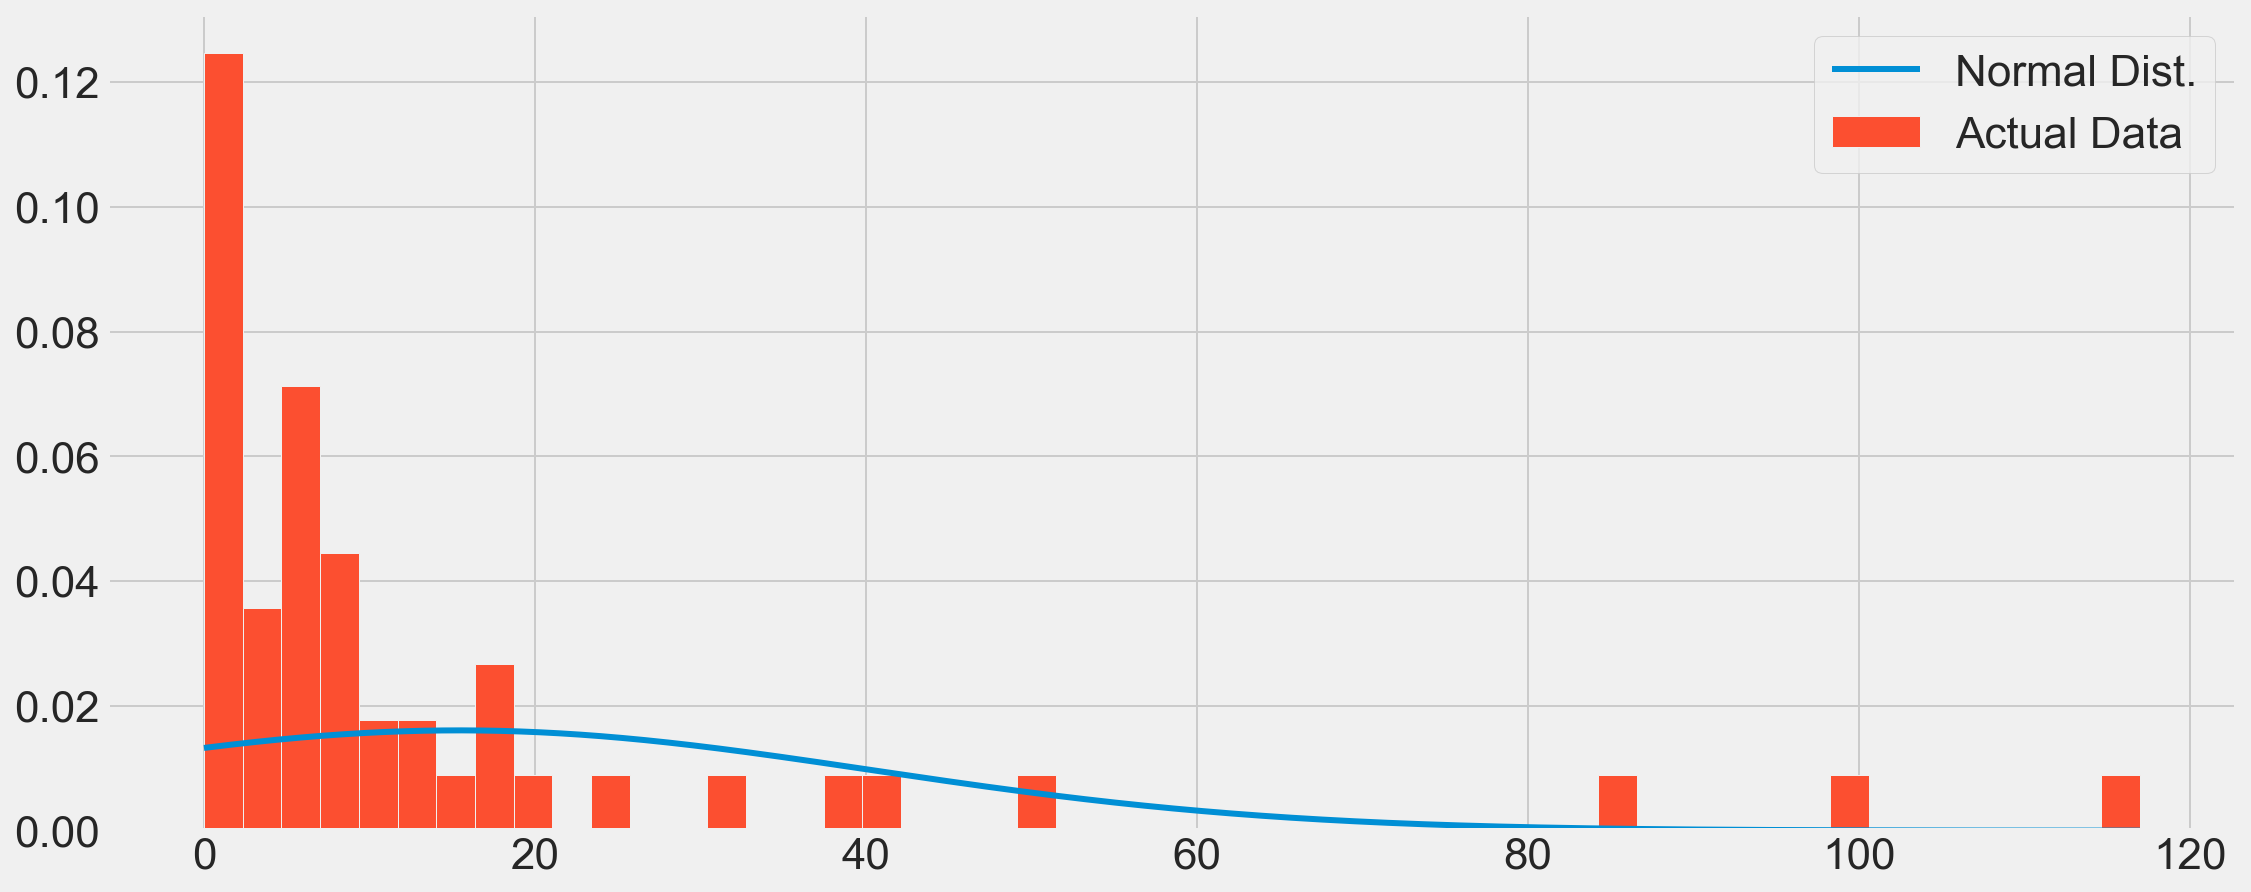

In [31]:
# Plot the data with with expected distribution, under the hypothesis that it is normally distributed. 
#  The blue line is the expected data density, with the same mean and standard deviation, if the data are normal. 
xs = np.arange(d2.min(), d2.max(), 0.01)
fit = stats.norm.pdf(xs, np.mean(d2), np.std(d2))
plt.plot(xs, fit, label='Normal Dist.', lw=3)
plt.hist(d2, 50, density=True, label='Actual Data')
plt.legend();

In [32]:
# Set up a helper function for checking p-values against an alpha level, and printing result
def check_p_val(p_val, alpha):

    if p_val < alpha:
        print('We have evidence to reject the null hypothesis.')
    else:
        print('We do not have evidence to reject the null hypothesis.')

In [33]:
# In scipy, the 'normaltest' function tests whether a sample differs from a normal distribution
#  The null hypothesis is that the data are normally distributed.
#    We can use normaltest to check this null - do we have to reject the null (to claim the data are not normal).
#  It does using a combined statistics comparing the skew and kurtosis of the observed
#    data, as compared to as expected under a normal distribution. 

# Run normal test on the data
stat, p_val = normaltest(d2)

# Check the p-value of the normaltest
print('\nNormaltest p value is: {:1.2e} \n'.format(p_val))

# With alpha value of 0.05, how should we proceed
check_p_val(p_val, alpha=0.05)


Normaltest p value is: 6.28e-11 

We have evidence to reject the null hypothesis.


Here, we have confirmation that these data deviate from the Normal distribution. So, the linear regression above is not statistically sound.

So, let's look log10-transforming the Pulitzer count data! This will shift the values from being centered near zero when put on the log scale.

When you log-transform data, the values close to zero are spread out across the distribution. Take a look at what we mean blow, where the Pulitzer values are not all scrunched around zero:


In [34]:
# log transform with a 0.1 offset
pulitzer['pulitzer_log10'] = np.log10(pulitzer['Pulitzer Prize Winners and Finalists, 1990-2014'] + 0.1)

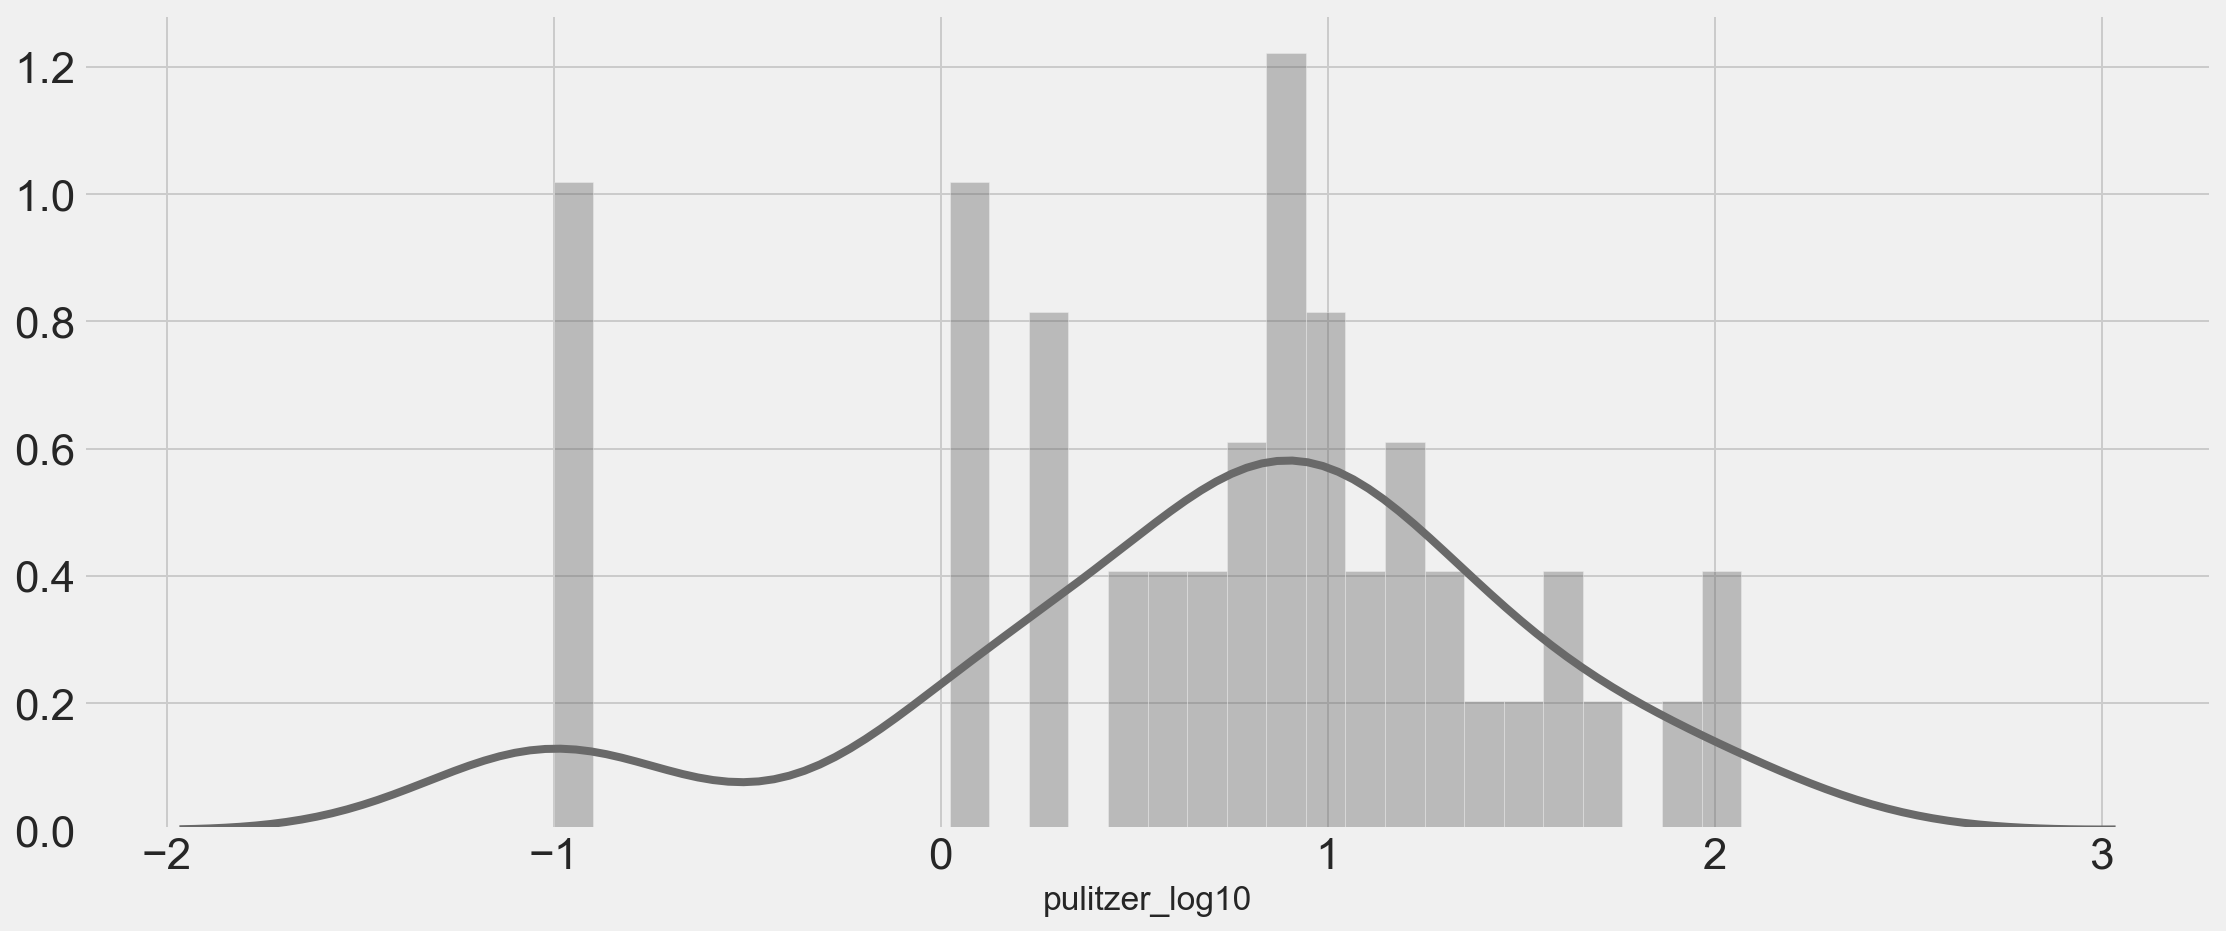

In [35]:
sns.distplot(pulitzer['pulitzer_log10'], 
             kde=True, bins=30, color="dimgrey")
ax1.set_xlabel('1990-2003')
ax1.set_ylabel('Number of Pulitzers');

Well, the distribution is more Normal...but what's going on down around -1? Well, this is because there were zeroes in the original dataset (see below). Due to this we used an offset of 0.1 in the log transformation above. These zeroes all show up at -1 as the $log_{10}(0+0.1) = -1$. 

In [36]:
pulitzer[pulitzer['pulitzer_log10'] < 0]

,Newspaper,"Daily Circulation, 2004","Daily Circulation, 2013","Change in Daily Circulation, 2004-2013","Pulitzer Prize Winners and Finalists, 1990-2003","Pulitzer Prize Winners and Finalists, 2004-2014","Pulitzer Prize Winners and Finalists, 1990-2014",pulitzer_log10
6,New York Post,642844.0,500521.0,-22.0,0,0,0,-1.0
39,San Antonio Express-News,246057.0,139005.0,-44.0,0,0,0,-1.0
42,Tampa Tribune,238877.0,191477.0,-20.0,0,0,0,-1.0
44,Boston Herald,236899.0,95929.0,-60.0,0,0,0,-1.0
47,Daily Oklahoman,223403.0,124667.0,-44.0,0,0,0,-1.0


Let's test form Normality again!

In [37]:
# normal data
d1 = stats.norm.rvs(size=48)
# our data
d2 = pulitzer['pulitzer_log10']

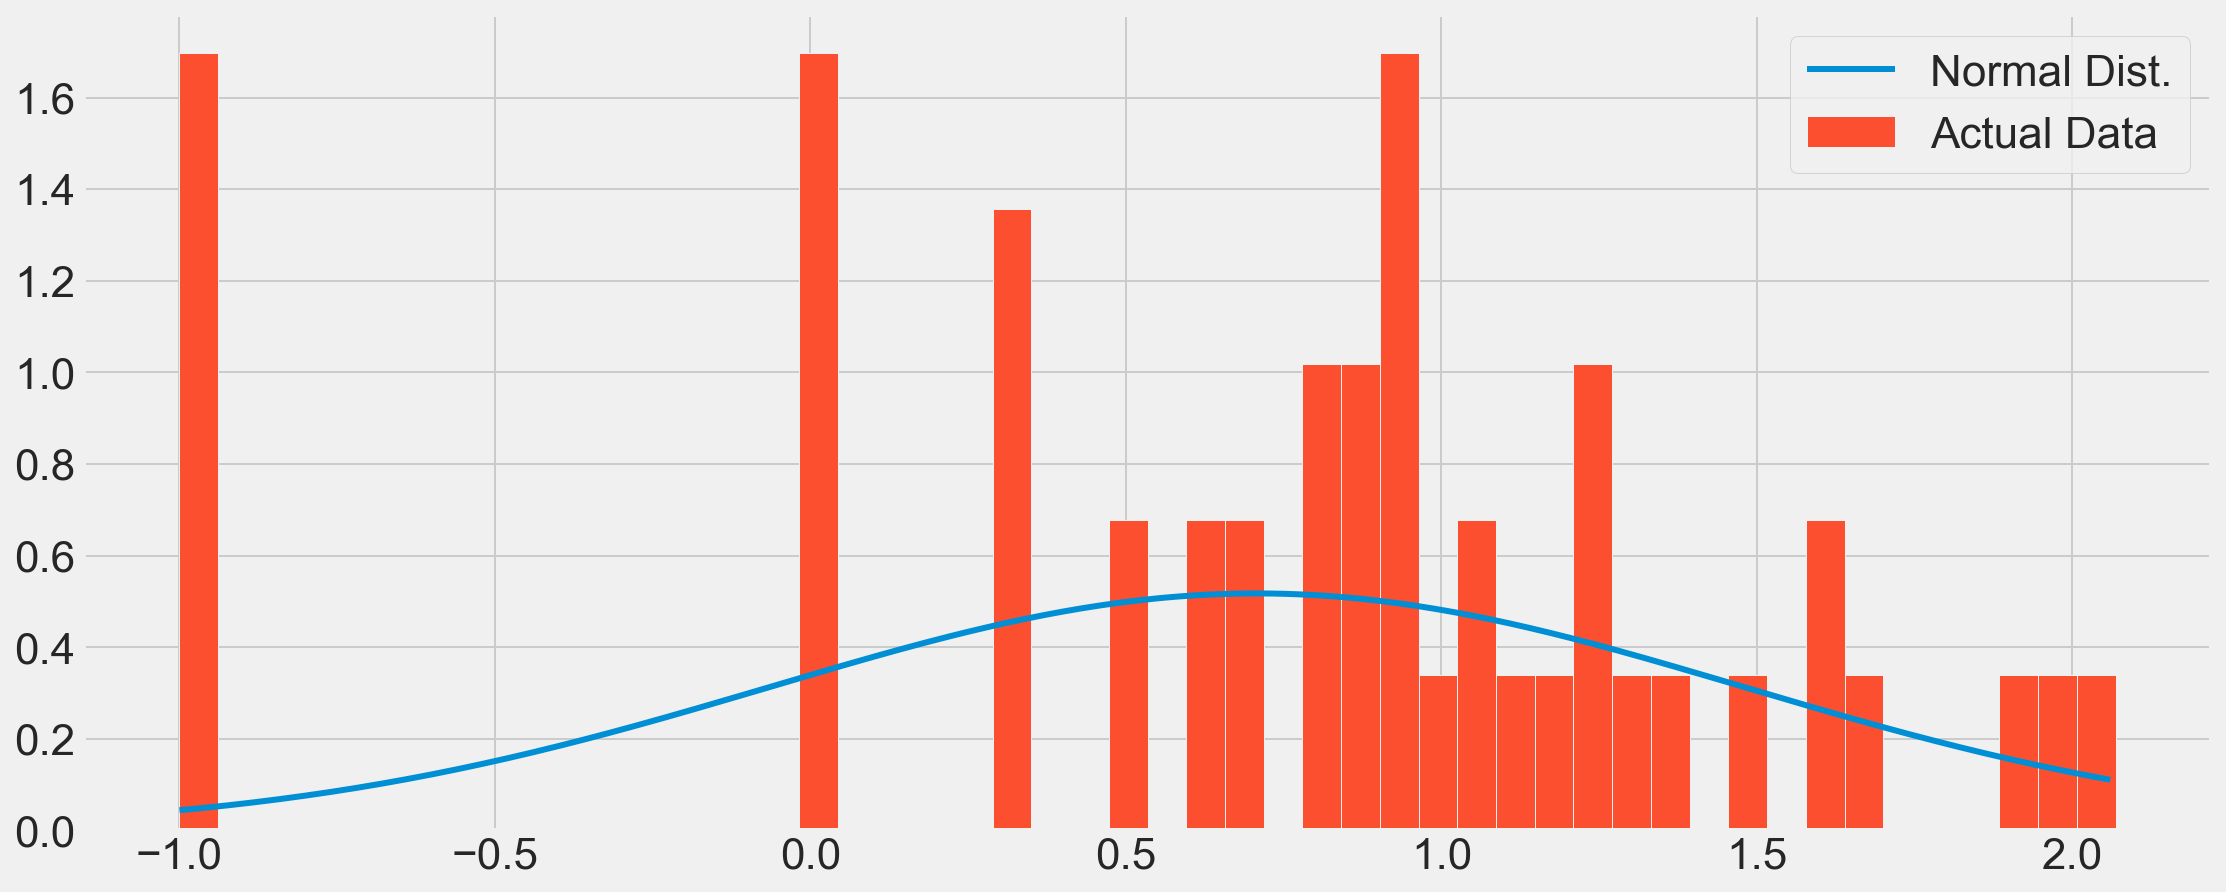

In [38]:
# Plot the data with with expected distribution, under the hypothesis that it is normally distributed. 
#  The blue line is the expected data density, with the same mean and standard deviation, if the data are normal. 
xs = np.arange(d2.min(), d2.max(), 0.01)
fit = stats.norm.pdf(xs, np.mean(d2), np.std(d2))
plt.plot(xs, fit, label='Normal Dist.', lw=3)
plt.hist(d2, 50, density=True, label='Actual Data')
plt.legend();

In [39]:
# Run normal test on the data
stat, p_val = normaltest(d2)

# Check the p-value of the normaltest
print('\nNormaltest p value is: {:1.2e} \n'.format(p_val))

# With alpha value of 0.05, how should we proceed
check_p_val(p_val, alpha=0.05)


Normaltest p value is: 7.47e-02 

We do not have evidence to reject the null hypothesis.


Great! The data, while limited in the number of observations, are approximately Normal. Let's carry out a valid regression now!

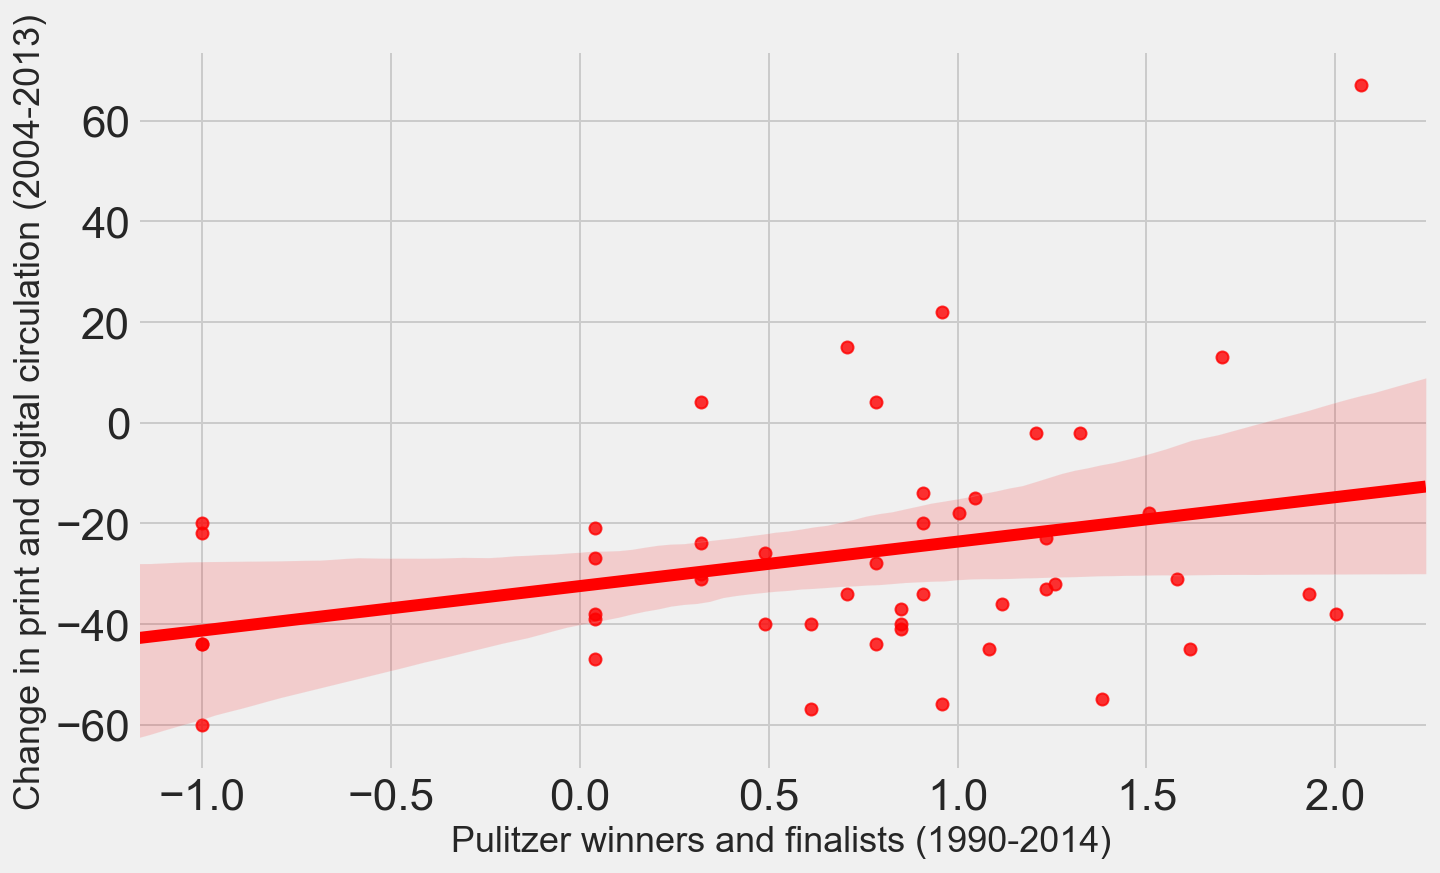

In [42]:
# Relationship between the total number of Pulitzers and change readership

sns.lmplot(x = 'pulitzer_log10',
           y = 'Change in Daily Circulation, 2004-2013',
           data = pulitzer, 
           fit_reg = True, 
           height = 6,
           aspect = 1.7, 
           line_kws={'color': 'red'},
           scatter_kws={'color': 'red'})
plt.xlabel('Pulitzer winners and finalists (1990-2014)', size=18)
plt.ylabel('Change in print and digital circulation (2004-2013)', size=18)
plt.title('');

In [48]:
# get subset of data we'll use for regression
df = pulitzer[['Change in Daily Circulation, 2004-2013', 
                         'pulitzer_log10']]
df.columns = ['circulation', 'pulitzer_log10']
df.head()

,circulation,pulitzer_log10
0,-24.0,0.322219
1,13.0,1.699838
2,67.0,2.068557
3,-34.0,1.929930
4,-38.0,2.000434


In [51]:
outcome, predictors = patsy.dmatrices('circulation ~ pulitzer_log10', df)

# Now use statsmodels to intialize an OLS linear model
#  This step initializes the model, and provides the data (but does not actually compute the model)
mod_log = sm.OLS(outcome, predictors)

# fit the model
res_log = mod_log.fit()

# Check out the results
print(res_log.summary())

                            OLS Regression Results                            
Dep. Variable:            circulation   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     4.408
Date:                Thu, 09 May 2019   Prob (F-statistic):             0.0413
Time:                        10:03:42   Log-Likelihood:                -216.48
No. Observations:                  48   AIC:                             437.0
Df Residuals:                      46   BIC:                             440.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -32.5017      4.403     -7.

Here, we can't determine our beta estimate (`coef`) as above because we log-transformed our data. In order to interpet 8.32, we would say that for every one unit increase in the number of pulitzers a publication has, the viewership increases by `~(coef/100)`, which here would be (8.3/100)...or 0.083. That effect is pretty small. This is further reflected in the p-value (0.04), which suggests that we would see these results, or something more extreme due to random chance alone approximagely 4% of the time.

We can therefore conclude that based on the data we have over these two time periods, there is a significant relationship between the number of Pulitzers a publication wins and the papers readership but that effect is quite minimal. We also know that this analysis is likely failing to take into account the effect of confounders we discussed in class, limiting our confidence in this result.

Note, of course, there are limitations to this analysis. There are other measures of prestige _and_ other measures of readership (electronic-only, for instance), that could help to answer this question. All analyses have limitations. Here, we've just noted a few. Be sure to consider all limitations for your final projects and include them in your Jupyter Notebook reports.